In [64]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

earthquakes = pd.read_csv("https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv")
base_map = gpd.read_file("/Users/katherine/MEDS/EDS-220/eds220-2024-sections/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [74]:
base_map.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

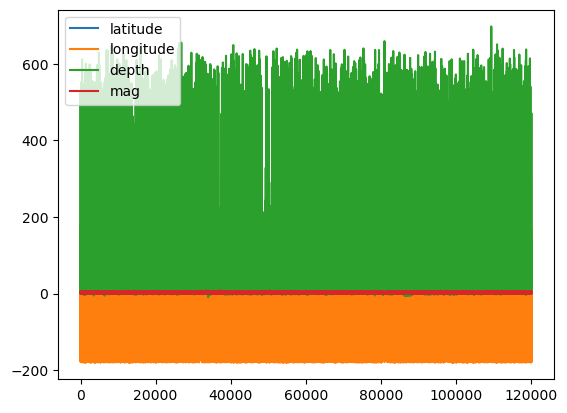

In [65]:
earthquakes.plot()

<Axes: >

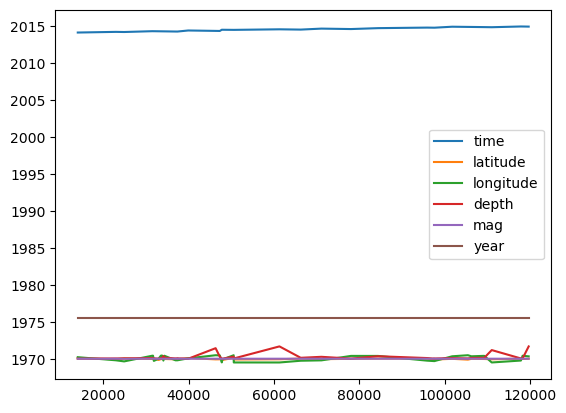

In [71]:
# Filter data
earthquakes = earthquakes[(earthquakes['mag'] > 6.5)]
earthquakes['time'] = pd.to_datetime(earthquakes.time)

earthquakes['year']=earthquakes['time'].dt.year

earthquakes = earthquakes[(earthquakes['year'] == 2014)]

<Axes: >

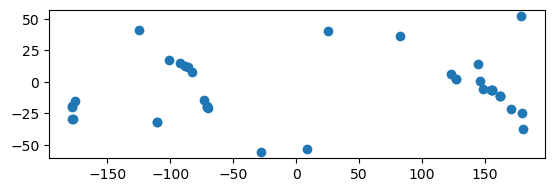

In [72]:
# Create points from latitude and longitude
points = gpd.points_from_xy(earthquakes.longitude, 
                            earthquakes.latitude)

# Create geodataframe
earthquakes = gpd.GeoDataFrame(earthquakes,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )

earthquakes.plot()

In [ ]:
# Create points from latitude and longitude
points = gpd.points_from_xy(earthquakes.longitude, 
                            earthquakes.latitude)

# Create geodataframe
earthquakes = gpd.GeoDataFrame(earthquakes,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4326'  # Specify CRS
                                )

earthquakes.plot()

In [82]:
worldmap = gpd.GeoDataFrame(base_map,
                            geometry=base_map.geometry,
                           crs='EPSG:4326')

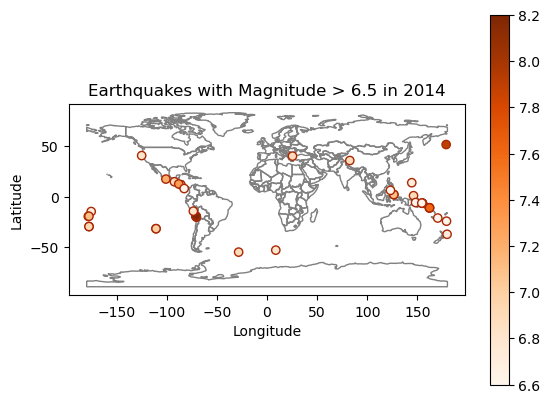

In [92]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Add California boundary
worldmap.plot(ax = ax,
                color = 'none',
                edgecolor = 'grey')

# Add pigs point plot to our figure's axis
earthquakes.plot(ax = ax,
                column = 'mag',
                legend=True,
                edgecolors= '#AA2704',
                cmap='Oranges')

# Customization
ax.set_title('Earthquakes with Magnitude > 6.5 in 2014')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the figure
plt.show()